In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
from matplotlib import pyplot as plt

# Dataset 0


In [2]:
df_0 = pd.read_csv('../DATASET-10_6/dataset0/train0.csv',header=None,skiprows=1,sep='\t')
df_0.columns=['graph','sub_graph']

In [3]:
df_0['graph'] = [str(df_0['graph'][i]).zfill(10) for i in range(len(df_0['graph']))]
df_0['sub_graph'] = [str(df_0['sub_graph'][i]).zfill(6) for i in range(len(df_0['sub_graph']))]

In [4]:
X_train = list(df_0['graph'])
y_train = list(df_0['sub_graph'])

In [5]:
df_0['graph']=[[int(df_0['graph'][j][i]) for i in range(len(df_0['graph'][j]))] for j in range(len(df_0['graph']))]
df_0['sub_graph']=[[int(df_0['sub_graph'][j][i]) for i in range(len(df_0['sub_graph'][j]))] for j in range(len(df_0['sub_graph']))]

In [6]:
df_0.head()

,graph,sub_graph
0,"[1, 1, 0, 0, 1, 0, 1, 0, 1, 0]","[1, 1, 0, 1, 0, 0]"
1,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 1]","[1, 0, 0, 1, 0, 0]"
2,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1, 0, 0, 0, 1]"
3,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 1]","[1, 1, 0, 0, 0, 0]"
4,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 0]","[0, 0, 0, 1, 0, 1]"


In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1)

In [9]:
cls.fit(list(df_0['graph']),list(df_0['sub_graph']))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
df_0_test = pd.read_csv('../DATASET-10_6/dataset0/test0.csv',header=None,skiprows=1,sep='\t')
df_0_test.columns=['graph','sub_graph']

In [11]:
df_0_test['graph'] = [str(df_0_test['graph'][i]).zfill(10) for i in range(len(df_0_test['graph']))]
df_0_test['sub_graph'] = [str(df_0_test['sub_graph'][i]).zfill(6) for i in range(len(df_0_test['sub_graph']))]

In [12]:
df_0_test['graph']=[[int(df_0_test['graph'][j][i]) for i in range(len(df_0['graph'][j]))] for j in range(len(df_0_test['graph']))]
df_0_test['sub_graph']=[[int(df_0_test['sub_graph'][j][i]) for i in range(len(df_0['sub_graph'][j]))] for j in range(len(df_0_test['sub_graph']))]

In [13]:
df_0_test.head()

,graph,sub_graph
0,"[1, 0, 1, 1, 0, 0, 0, 1, 1, 0]","[1, 0, 1, 0, 0, 1]"
1,"[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]","[0, 0, 0, 1, 1, 1]"
2,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 1]","[1, 0, 0, 0, 0, 0]"
3,"[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]","[0, 0, 1, 0, 1, 1]"
4,"[0, 0, 1, 1, 0, 0, 1, 0, 1, 1]","[0, 0, 1, 0, 0, 0]"


In [14]:
cls.predict(list(df_0_test['graph']))

array([[1, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1]])

In [15]:
y_pred = cls.predict(list(df_0_test['graph']))

In [16]:
cls.predict_proba(list(df_0_test['graph']))

array([[7.81581760e-01, 7.76716908e-01, 9.56889528e-01, 7.40787394e-02,
        4.10692630e-01, 9.35899877e-01],
       [1.36250454e-02, 1.91721202e-03, 1.59399939e-10, 1.00000000e+00,
        9.96601855e-01, 1.00000000e+00],
       [9.99961753e-01, 3.05385107e-03, 8.73775855e-34, 2.13082902e-06,
        8.86516222e-03, 1.98017292e-28],
       ...,
       [9.99999981e-01, 9.99676078e-01, 1.00000000e+00, 1.00000000e+00,
        4.64898157e-04, 1.09061721e-25],
       [2.82865886e-04, 9.91907058e-01, 1.00000000e+00, 9.99996392e-01,
        9.97655667e-01, 1.00000000e+00],
       [7.98729380e-09, 7.73844190e-05, 1.00000000e+00, 1.00000000e+00,
        9.99849097e-01, 1.00000000e+00]])

In [17]:
from sklearn.metrics import multilabel_confusion_matrix

In [18]:
labels = ['{0:06b}'.format(i) for i in range(2**6)]

In [19]:
df_0_test.head()

,graph,sub_graph
0,"[1, 0, 1, 1, 0, 0, 0, 1, 1, 0]","[1, 0, 1, 0, 0, 1]"
1,"[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]","[0, 0, 0, 1, 1, 1]"
2,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 1]","[1, 0, 0, 0, 0, 0]"
3,"[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]","[0, 0, 1, 0, 1, 1]"
4,"[0, 0, 1, 1, 0, 0, 1, 0, 1, 1]","[0, 0, 1, 0, 0, 0]"


In [20]:
y_true = [(''.join(map(str, df_0_test['sub_graph'][i]))) for i in range(len(df_0_test['sub_graph']))]


In [21]:
y_pred = [(''.join(map(str, y_pred[i]))) for i in range(len(y_pred))]

In [22]:
y_true_train = y_train
y_pred_train = cls.predict(list(df_0['graph']))

In [23]:
y_pred_train = [(''.join(map(str, y_pred_train[i]))) for i in range(len(y_pred_train))]

In [24]:
cm_train = confusion_matrix(y_true_train,y_pred_train)

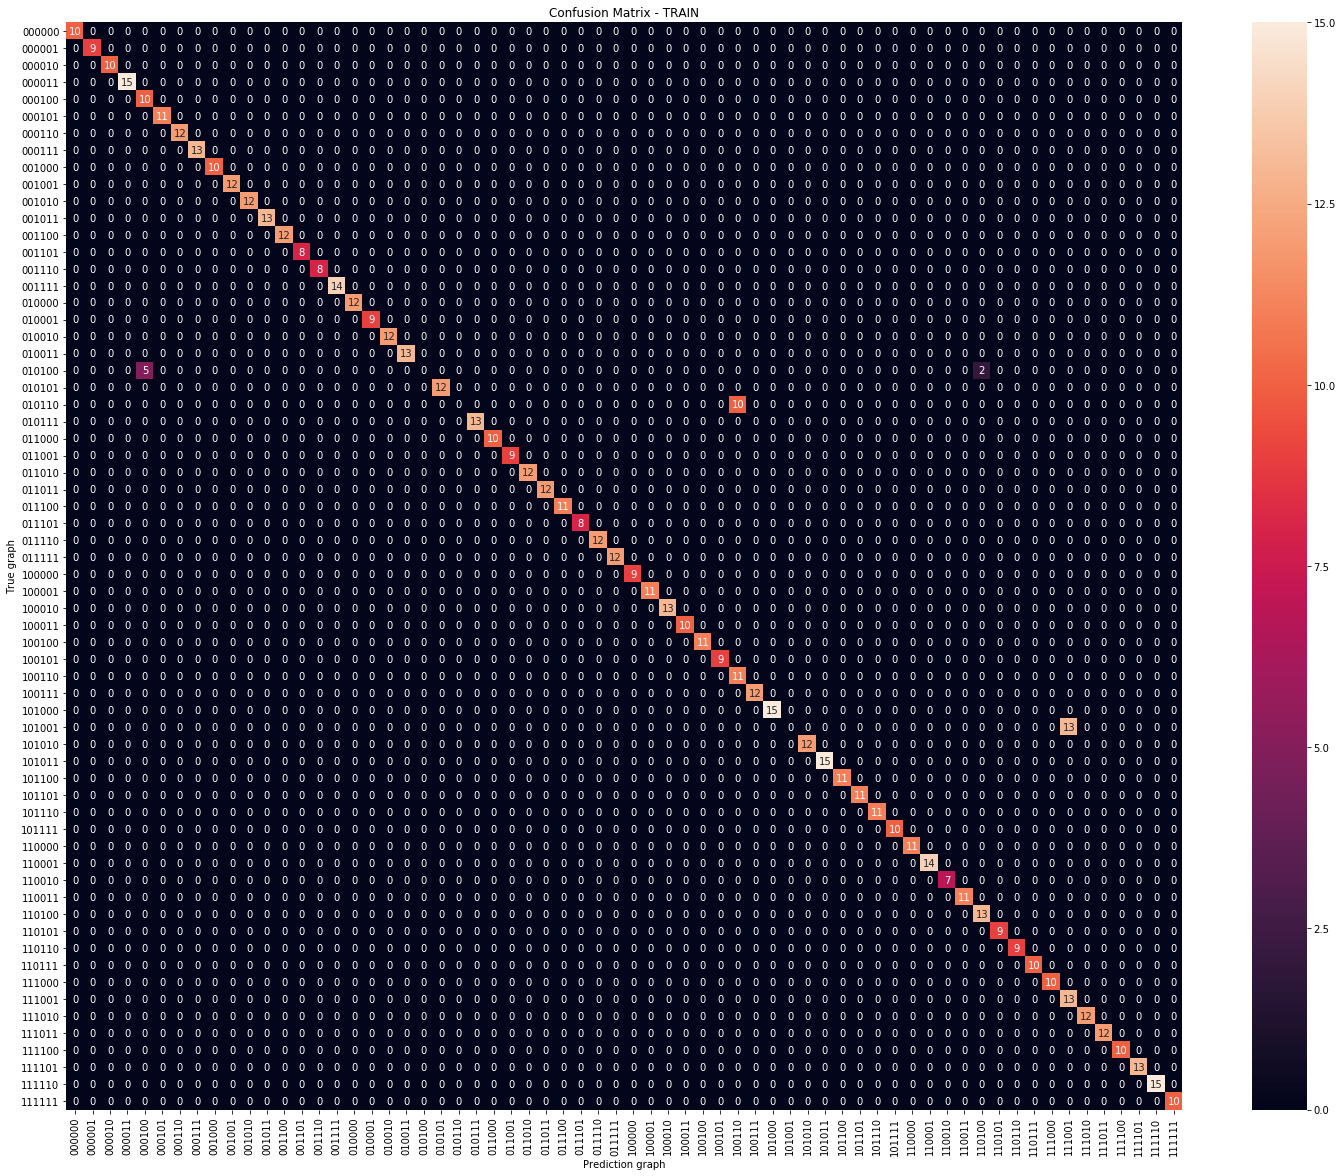

In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size



ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical');
ax.yaxis.set_ticklabels(labels,rotation='horizontal');

In [26]:
print("\n\n******************** TRAIN ******************** \n\n")
print(classification_report(y_true_train,y_pred_train))



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
cm = confusion_matrix(y_true, y_pred)

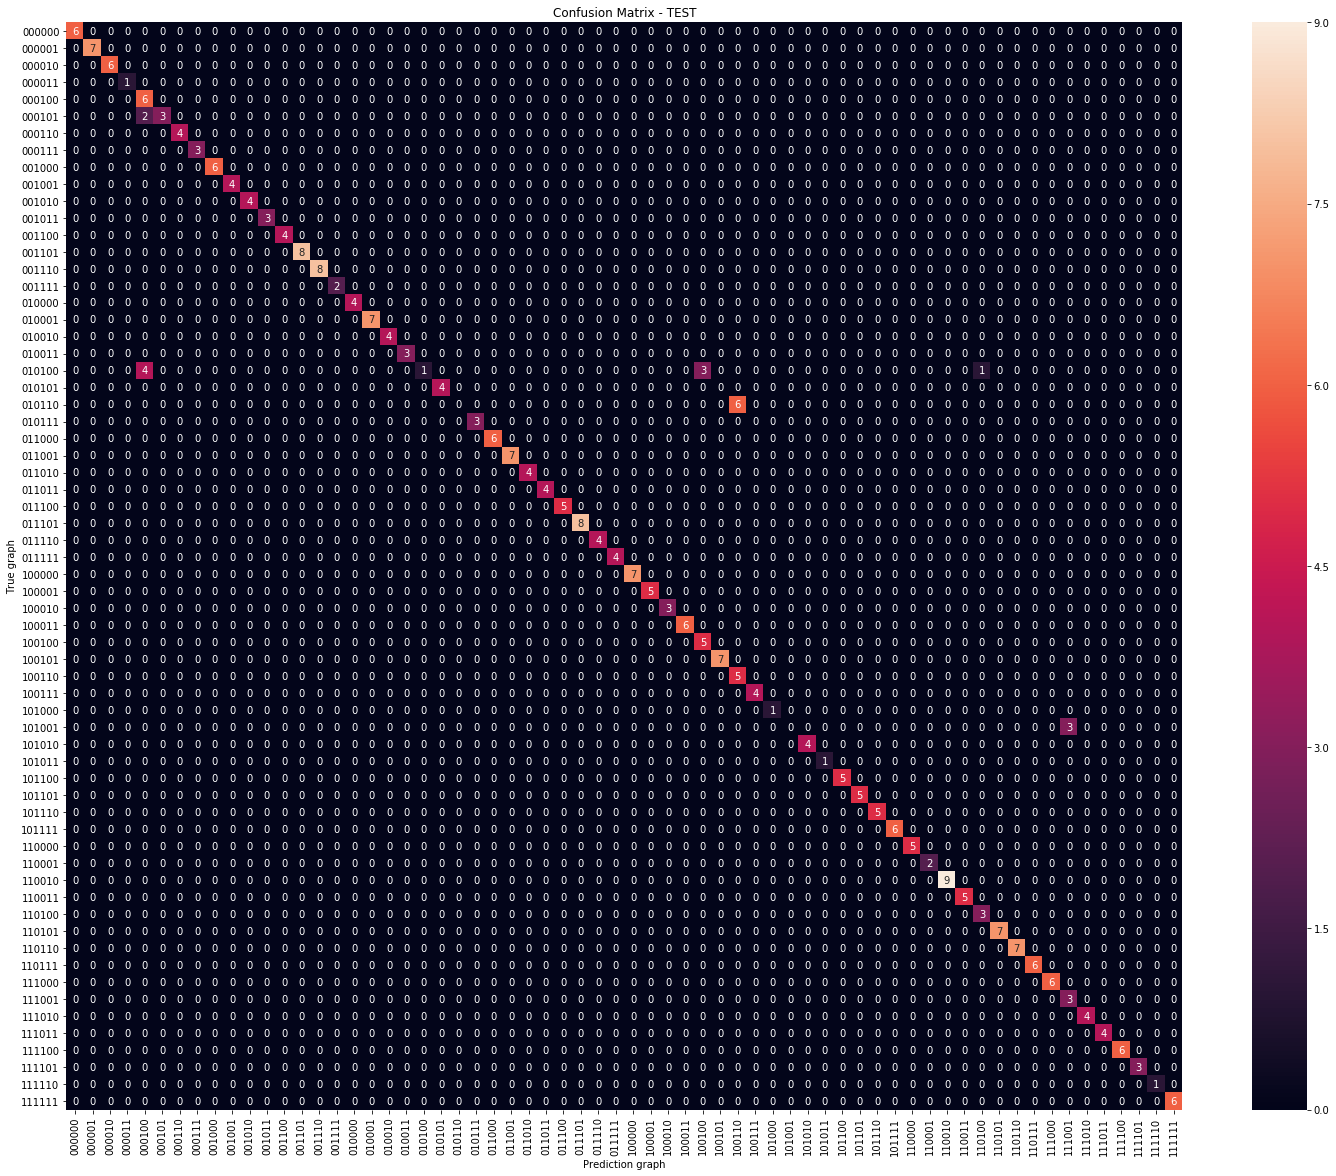

In [28]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TEST'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical');
ax.yaxis.set_ticklabels(labels,rotation='horizontal');

In [29]:
print("\n\n******************** TEST ******************** \n\n")
print(classification_report(y_true, y_pred))



******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      